In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import training data-set sentiment_analysis.csv
df=pd.read_csv('sentiment_analysis.csv')

In [ ]:
#from google.colab import files
#data_to_load = files.upload()

Saving sentiment_analysis.csv to sentiment_analysis.csv


In [ ]:
#import io
#df = pd.read_csv(io.BytesIO(data_to_load['sentiment_analysis.csv']))

In [ ]:
df=pd.read_csv('sentiment_analysis.csv')

In [ ]:
df

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [ ]:
print("Total no. of tweets :",df.shape[0])

Total no. of tweets : 550391


# Preparing Data for Analysis

In [ ]:
df.isnull().sum().sum()

0

There are no rows with null values

Remove duplicate tweets

In [ ]:
df.drop_duplicates(subset=['ID','text'],inplace=True,ignore_index=True) # removing duplicates
print("After removing duplicates:",df.shape)

After removing duplicates: (542050, 3)


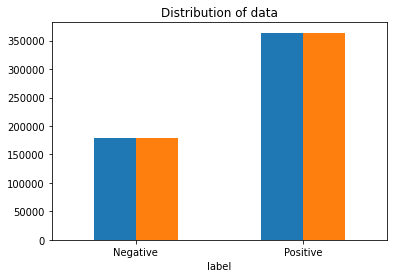

In [ ]:
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
plt.show()

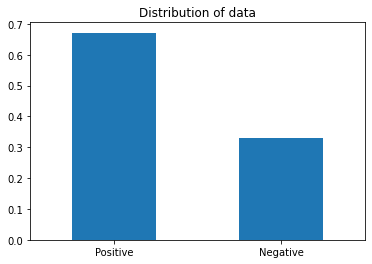

In [ ]:
s=df['label'].value_counts()/len(df) # pandas series of positive and negative percentages
ax=s.plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Positive','Negative'], rotation=0)
plt.show()

Therefore, it is an unbalanced data set. and evaluation should be done by using confusion matrix. 67% of tweets are of positive polarity and 33% are of negative polarity.

# 1. convert text into lower case

In [ ]:
df['lower']=df['text'].str.lower()

#2. remove url 

In [ ]:
import re
# using the 're.sub' to remove urls.
def remove_urls(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.(\w+)", "", text)
    return text
# calling function to remove all urls
df["noURL"]=df["lower"].apply(remove_urls)

In [ ]:
print(df["text"][0])
print(df["noURL"][0])

Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday https://t.co/antImqAo4Y https://t.co/ejnA78Sks0
josh jenkins is looking forward to tab breeders crown super sunday  


#3. remove stop words

removing stop words before removing punctuation because stops words we are using is made up of punctuation as well.

In [ ]:
# import nltk package to find stopwords
import nltk
from nltk.corpus import stopwords  
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['no_stopwords'] = df['noURL'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(df["text"][1])
print(df["no_stopwords"][1])

RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all odds! #JI_PakZindabadRallies https://t.co/1o…
rt @mianusmanjaved: congratulations pakistan becoming #no1testteam world odds! #ji_pakzindabadrallies


#4. remove punctuation

emojis are also removed with this step

In [ ]:
# using the 're.sub' to remove punctuation.
def remove_punctuation(text):
    text = re.sub(r"[^\w\s]", "", text)
    return text
df["no_punc"] = df["no_stopwords"].apply(remove_punctuation)

In [ ]:
print(df["text"][3])
print(df["no_punc"][3])

RT @david_gaibis: Newly painted walls, thanks a million to our custodial painters this summer.  Great job ladies!!!#EC_proud https://t.co/…
rt david_gaibis newly painted walls thanks million custodial painters summer great job ladiesec_proud


#5. remove numbers

In [ ]:
def removing_numbers(text):
    return re.sub('[0-9]+', '', text)
df['no_number'] = df['no_punc'].apply(lambda x: removing_numbers(x))

In [ ]:
print(df["text"][4])
print(df["no_number"][4])

RT @CedricFeschotte: Excited to announce: as of July 2017 Feschotte lab will be relocating to @Cornell MBG https://t.co/dd0FG7BRx3
rt cedricfeschotte excited announce july  feschotte lab relocating cornell mbg


# 6. Tokenize the text

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['tokens'] = df['no_number'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(df["text"][0])
print(df["tokens"][0])

Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday https://t.co/antImqAo4Y https://t.co/ejnA78Sks0
['josh', 'jenkins', 'looking', 'forward', 'tab', 'breeders', 'crown', 'super', 'sunday']


#7. Lemmatize


Stemming tweets using Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def stemming(text):
  return  [wnl.lemmatize(w) for w in text]
df['stemmed']= df['tokens'].apply(lambda x: stemming(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
print(df["text"][899])
print(df["stemmed"][899])

Found a Transponder Snail!Giants, sea monsters and other amazing encounters!https://t.co/IGYN79iR7D #TreCru https://t.co/0PHAPxEKtg
['found', 'transponder', 'snailgiants', 'sea', 'monster', 'amazing', 'encounter', 'trecru']


In [ ]:
df.columns

Index(['ID', 'text', 'label', 'lower', 'noURL', 'no_stopwords', 'no_punc',
       'no_number', 'tokens', 'stemmed'],
      dtype='object')

In [ ]:
df.head(5)

,ID,text,label,lower,noURL,no_stopwords,no_punc,no_number,tokens,stemmed
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,josh jenkins is looking forward to tab breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins looking forward tab breeders crow...,josh jenkins looking forward tab breeders crow...,josh jenkins looking forward tab breeders crow...,"[josh, jenkins, looking, forward, tab, breeder...","[josh, jenkins, looking, forward, tab, breeder..."
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,rt @mianusmanjaved: congratulations pakistan o...,rt @mianusmanjaved: congratulations pakistan o...,rt @mianusmanjaved: congratulations pakistan b...,rt mianusmanjaved congratulations pakistan bec...,rt mianusmanjaved congratulations pakistan bec...,"[rt, mianusmanjaved, congratulations, pakistan...","[rt, mianusmanjaved, congratulation, pakistan,..."
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"rt @pepalerts: this september, @yesmag is taki...","rt @pepalerts: this september, @yesmag is taki...","rt @pepalerts: september, @yesmag taking maine...",rt pepalerts september yesmag taking maine men...,rt pepalerts september yesmag taking maine men...,"[rt, pepalerts, september, yesmag, taking, mai...","[rt, pepalerts, september, yesmag, taking, mai..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"rt @david_gaibis: newly painted walls, thanks ...","rt @david_gaibis: newly painted walls, thanks ...","rt @david_gaibis: newly painted walls, thanks ...",rt david_gaibis newly painted walls thanks mil...,rt david_gaibis newly painted walls thanks mil...,"[rt, david_gaibis, newly, painted, walls, than...","[rt, david_gaibis, newly, painted, wall, thank..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,rt @cedricfeschotte: excited to announce: as o...,rt @cedricfeschotte: excited to announce: as o...,rt @cedricfeschotte: excited announce: july 20...,rt cedricfeschotte excited announce july 2017 ...,rt cedricfeschotte excited announce july fesc...,"[rt, cedricfeschotte, excited, announce, july,...","[rt, cedricfeschotte, excited, announce, july,..."


#8. Stemming of sentences not tokens

In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def stemming(text):
  return  wnl.lemmatize(text)
df['stemmed1']= df['no_number'].apply(lambda x: stemming(x))

In [ ]:
df

,ID,text,label,lower,noURL,no_stopwords,no_punc,no_number,tokens,stemmed,stemmed1
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,josh jenkins is looking forward to tab breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins looking forward tab breeders crow...,josh jenkins looking forward tab breeders crow...,josh jenkins looking forward tab breeders crow...,"[josh, jenkins, looking, forward, tab, breeder...","[josh, jenkins, looking, forward, tab, breeder...",josh jenkins looking forward tab breeders crow...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,rt @mianusmanjaved: congratulations pakistan o...,rt @mianusmanjaved: congratulations pakistan o...,rt @mianusmanjaved: congratulations pakistan b...,rt mianusmanjaved congratulations pakistan bec...,rt mianusmanjaved congratulations pakistan bec...,"[rt, mianusmanjaved, congratulations, pakistan...","[rt, mianusmanjaved, congratulation, pakistan,...",rt mianusmanjaved congratulations pakistan bec...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"rt @pepalerts: this september, @yesmag is taki...","rt @pepalerts: this september, @yesmag is taki...","rt @pepalerts: september, @yesmag taking maine...",rt pepalerts september yesmag taking maine men...,rt pepalerts september yesmag taking maine men...,"[rt, pepalerts, september, yesmag, taking, mai...","[rt, pepalerts, september, yesmag, taking, mai...",rt pepalerts september yesmag taking maine men...
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"rt @david_gaibis: newly painted walls, thanks ...","rt @david_gaibis: newly painted walls, thanks ...","rt @david_gaibis: newly painted walls, thanks ...",rt david_gaibis newly painted walls thanks mil...,rt david_gaibis newly painted walls thanks mil...,"[rt, david_gaibis, newly, painted, walls, than...","[rt, david_gaibis, newly, painted, wall, thank...",rt david_gaibis newly painted walls thanks mil...
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,rt @cedricfeschotte: excited to announce: as o...,rt @cedricfeschotte: excited to announce: as o...,rt @cedricfeschotte: excited announce: july 20...,rt cedricfeschotte excited announce july 2017 ...,rt cedricfeschotte excited announce july fesc...,"[rt, cedricfeschotte, excited, announce, july,...","[rt, cedricfeschotte, excited, announce, july,...",rt cedricfeschotte excited announce july fesc...
...,...,...,...,...,...,...,...,...,...,...,...
542045,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0,@goddesses_o i can't stop watching her...mm. m...,@goddesses_o i can't stop watching her...mm. m...,@goddesses_o can't stop watching her...mm. mor...,goddesses_o cant stop watching hermm more,goddesses_o cant stop watching hermm more,"[goddesses_o, cant, stop, watching, hermm, more]","[goddesses_o, cant, stop, watching, hermm, more]",goddesses_o cant stop watching hermm more
542046,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0,poor old tom odell doesn't look like he would ...,poor old tom odell doesn't look like he would ...,poor old tom odell look like would know wrong ...,poor old tom odell look like would know wrong ...,poor old tom odell look like would know wrong ...,"[poor, old, tom, odell, look, like, would, kno...","[poor, old, tom, odell, look, like, would, kno...",poor old tom odell look like would know wrong ...
542047,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1,#antsmasher i smashed 7 ants in this awesome ...,#antsmasher i smashed 7 ants in this awesome ...,#antsmasher smashed 7 ants awesome game!!!hjfjfi,antsmasher smashed 7 ants awesome gamehjfjfi,antsmasher smashed ants awesome gamehjfjfi,"[antsmasher, smashed, ants, awesome, gamehjfjfi]","[antsmasher, smashed, ant, awesome, gamehjfjfi]",antsmasher smashed ants awesome gamehjfjfi
542048,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,@lizhudston @kymwyllie @evasmiless @meanbok @l...,@li

In [ ]:
print(df["stemmed"][899])
print(df["stemmed1"][899])

['found', 'transponder', 'snailgiants', 'sea', 'monster', 'amazing', 'encounter', 'trecru']
found transponder snailgiants sea monsters amazing encounters trecru


# 9 Feature Engineering

In [ ]:
corpus=[]
for i in range(0,df.shape[0]):
  corpus.append(df["stemmed1"][i])
print("length of corpus",len(corpus))

length of corpus 542050


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(use_idf=True,ngram_range=(1,3),max_features=100, min_df=5, max_df=0.7, stop_words='english')  
X = tfidfconverter.fit_transform(corpus).toarray()

In [ ]:
#X=X.toarray()

In [ ]:
X.shape

(542050, 100)

In [ ]:
features=tfidfconverter.get_feature_names_out().tolist()

In [ ]:
vectorizer =TfidfVectorizer(vocabulary=features,use_idf=True,ngram_range=(1,3), min_df=5, max_df=0.7, stop_words='english')
vectorizer.fit(corpus)
A=vectorizer.transform(corpus).toarray()

In [ ]:
A==X

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
X=pd.DataFrame(data=X,columns=features)
y=df[['label']]

In [ ]:
X

,amazing,amazing encounters,amazing encounters trecru,amp,awesome,baby,bad,beautiful,best,better,...,trump,video,wait,want,watch,way,win,work,world,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900185,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
542046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
542047,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
542048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Training and Hyper-parameter tuning with 10fold Cross validation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
model=LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
solver='newton-cg'
best_model = model
best_params = {}
best_accuracy = 0
best_std = 0
accuracy_nw=[]
accuracy_nw1=[]
precision_nw=[]
recall_nw=[]
f1_nw=[]
roc_auc_nw=[]
for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    print('###########',"For :",solver,'and C : ',C,' is running','###########')
    
    model = LogisticRegression(C=C, solver=solver,max_iter=200)
    accuracy = np.zeros(10)
    accuracy_1=np.zeros(10) #with sklearn
    precision= np.zeros(10)
    recall=np.zeros(10)
    f1=np.zeros(10)
    roc_auc=np.zeros(10)
    np_idx = 0
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        #X_train = scaler.fit_transform(X_train)
        #X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        TN = confusion_matrix(y_test, predictions)[0][0]
        FP = confusion_matrix(y_test, predictions)[0][1]
        FN = confusion_matrix(y_test, predictions)[1][0]
        TP = confusion_matrix(y_test, predictions)[1][1]
        total = TN + FP + FN + TP
        ACC = (TP + TN) / float(total)

        accuracy[np_idx] = ACC*100
        accuracy_1[np_idx]= accuracy_score(y_test,predictions, normalize=True)
        precision[np_idx]=precision_score(y_test,predictions)
        recall[np_idx]=recall_score(y_test,predictions)
        f1[np_idx]=f1_score(y_test,predictions)
        roc_auc[np_idx]=roc_auc_score(y_test,model.predict_proba(X_test)[:, 1]) # probability of class with greater label
        np_idx += 1
    
    if np.mean(accuracy) > best_accuracy:
        best_model = model
        best_params = {'C':C, 'solver':solver}
        best_accuracy = np.mean(accuracy)
        best_std = np.std(accuracy)
    accuracy_nw.append(np.mean(accuracy))    
    accuracy_nw1.append(np.mean(accuracy_1))
    precision_nw.append(np.mean(precision))
    recall_nw.append(np.mean(recall))
    f1_nw.append(np.mean(f1))
    roc_auc_nw.append(np.mean(roc_auc))
print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

########### For : newton-cg and C :  0.001  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  0.01  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  0.05  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  0.1  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  0.5  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  1  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  5  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  10  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  100  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 1, 'solver': 'newton-cg'}
Best Score: 84.452%(1.871%)

The optimal log model uses C=1, and a newton-cg solver, and has a cross validation score of 84.452% with a standard deviation of 1.871%


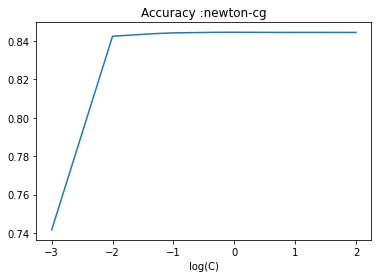

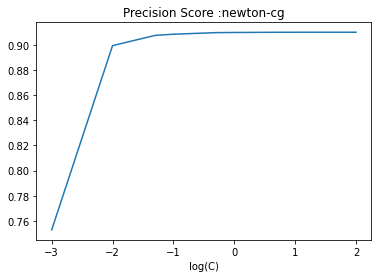

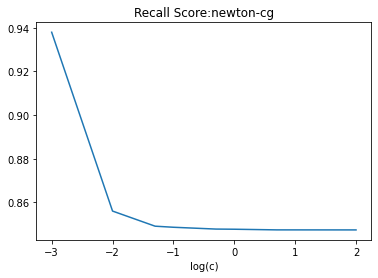

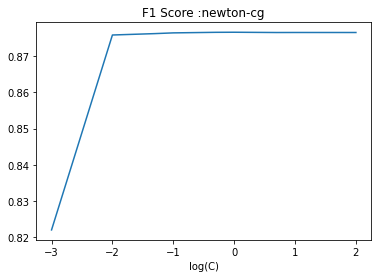

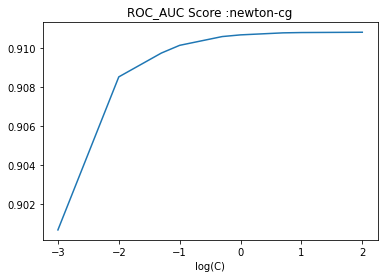

In [ ]:
C=[0.001,0.01,0.05,0.1,0.5,1,5,10, 100]
C=np.log10(np.array(C))
plt.plot(C,accuracy_nw1) ##accuracy
plt.title('Accuracy :' + solver)
plt.xlabel('log(C)')
plt.show()

plt.plot(C,precision_nw) ##precision
plt.title('Precision Score :' + solver)
plt.xlabel('log(C)')
plt.show()

plt.plot(C,recall_nw) ##recall
plt.title('Recall Score:' + solver)
plt.xlabel('log(c)')
plt.show()

plt.plot(C,f1_nw) ##F1 score
plt.title('F1 Score :' + solver)
plt.xlabel('log(C)')
plt.show()

plt.plot(C,roc_auc_nw) ##roc_auc score
plt.title('ROC_AUC Score :' + solver)
plt.xlabel('log(C)')
plt.show()


max features set to 200

In [ ]:
tfidfconverter = TfidfVectorizer(use_idf=True,ngram_range=(1,3),max_features=200, min_df=5, max_df=0.7, stop_words='english')  
X = tfidfconverter.fit_transform(corpus).toarray()
features=tfidfconverter.get_feature_names_out().tolist()
X=pd.DataFrame(data=X,columns=features)

In [ ]:
X

,amazing,amazing encounters,amazing encounters trecru,amp,ass,awesome,baby,bad,bday,beautiful,...,win,winter,wish,wonderful,work,world,wow,yall,year,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.632145,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
542046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
542047,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
542048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.500234,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
model=LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
solver='newton-cg'
best_model = model
best_params = {}
best_accuracy = 0
best_std = 0
accuracy_nw=[]
accuracy_nw1=[]
precision_nw=[]
recall_nw=[]
f1_nw=[]
roc_auc_nw=[]
for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    print('###########',"For :",solver,'and C : ',C,' is running','###########')
    
    model = LogisticRegression(C=C, solver=solver,max_iter=200)
    accuracy = np.zeros(10)
    accuracy_1=np.zeros(10) #with sklearn
    precision= np.zeros(10)
    recall=np.zeros(10)
    f1=np.zeros(10)
    roc_auc=np.zeros(10)
    np_idx = 0
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        #X_train = scaler.fit_transform(X_train)
        #X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        TN = confusion_matrix(y_test, predictions)[0][0]
        FP = confusion_matrix(y_test, predictions)[0][1]
        FN = confusion_matrix(y_test, predictions)[1][0]
        TP = confusion_matrix(y_test, predictions)[1][1]
        total = TN + FP + FN + TP
        ACC = (TP + TN) / float(total)

        accuracy[np_idx] = ACC*100
        accuracy_1[np_idx]= accuracy_score(y_test,predictions, normalize=True)
        precision[np_idx]=precision_score(y_test,predictions)
        recall[np_idx]=recall_score(y_test,predictions)
        f1[np_idx]=f1_score(y_test,predictions)
        roc_auc[np_idx]=roc_auc_score(y_test,model.predict_proba(X_test)[:, 1]) # probability of class with greater label
        np_idx += 1
    
    if np.mean(accuracy) > best_accuracy:
        best_model = model
        best_params = {'C':C, 'solver':solver}
        best_accuracy = np.mean(accuracy)
        best_std = np.std(accuracy)
    accuracy_nw.append(np.mean(accuracy))    
    accuracy_nw1.append(np.mean(accuracy_1))
    precision_nw.append(np.mean(precision))
    recall_nw.append(np.mean(recall))
    f1_nw.append(np.mean(f1))
    roc_auc_nw.append(np.mean(roc_auc))
print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

########### For : newton-cg and C :  0.001  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  0.01  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  0.05  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  0.1  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  0.5  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  1  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  5  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  10  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

########### For : newton-cg and C :  100  is running ###########


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 100, 'solver': 'newton-cg'}
Best Score: 87.986%(1.509%)

The optimal log model uses C=100, and a newton-cg solver, and has a cross validation score of 87.986% with a standard deviation of 1.509%


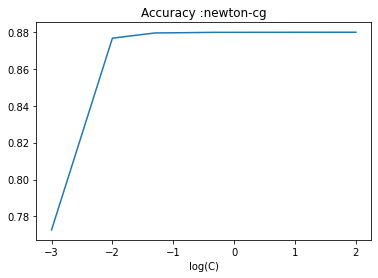

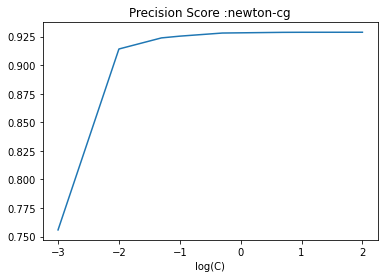

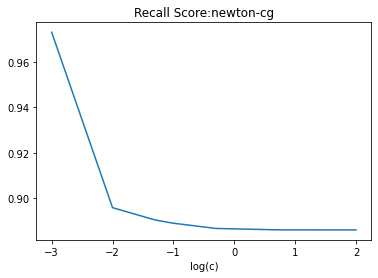

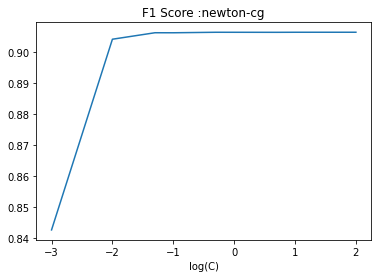

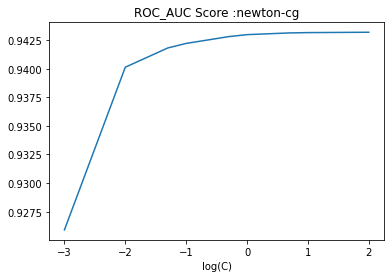

In [ ]:
C=[0.001,0.01,0.05,0.1,0.5,1,5,10, 100]
C=np.log10(np.array(C))
plt.plot(C,accuracy_nw1) ##accuracy
plt.title('Accuracy :' + solver)
plt.xlabel('log(C)')
plt.show()

plt.plot(C,precision_nw) ##precision
plt.title('Precision Score :' + solver)
plt.xlabel('log(C)')
plt.show()

plt.plot(C,recall_nw) ##recall
plt.title('Recall Score:' + solver)
plt.xlabel('log(c)')
plt.show()

plt.plot(C,f1_nw) ##F1 score
plt.title('F1 Score :' + solver)
plt.xlabel('log(C)')
plt.show()

plt.plot(C,roc_auc_nw) ##roc_auc score
plt.title('ROC_AUC Score :' + solver)
plt.xlabel('log(C)')
plt.show()


with max features =300 

In [ ]:
tfidfconverter = TfidfVectorizer(use_idf=True,ngram_range=(1,3),max_features=300, min_df=5, max_df=0.7, stop_words='english')  
X = tfidfconverter.fit_transform(corpus).toarray()
features=tfidfconverter.get_feature_names_out().tolist()
X=pd.DataFrame(data=X,columns=features)

In [ ]:
X

,actually,amazing,amazing encounters,amazing encounters trecru,amazing fauna,amazing fauna winter,america,amp,art,ass,...,wonderful,work,world,wow,wrong,ya,yall,year,years,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.632145,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
542046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.523273,0.0,0.0,0.0,0.0,0.0
542047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
542048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.500234,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model=LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
solver='newton-cg'
best_model = model
best_params = {}
best_accuracy = 0
best_std = 0
accuracy_nw=[]
accuracy_nw1=[]
precision_nw=[]
recall_nw=[]
f1_nw=[]
roc_auc_nw=[]
for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    print('###########',"For :",solver,'and C : ',C,' is running','###########')
    
    model = LogisticRegression(C=C, solver=solver,max_iter=200)
    accuracy = np.zeros(10)
    accuracy_1=np.zeros(10) #with sklearn
    precision= np.zeros(10)
    recall=np.zeros(10)
    f1=np.zeros(10)
    roc_auc=np.zeros(10)
    np_idx = 0
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        #X_train = scaler.fit_transform(X_train)
        #X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        TN = confusion_matrix(y_test, predictions)[0][0]
        FP = confusion_matrix(y_test, predictions)[0][1]
        FN = confusion_matrix(y_test, predictions)[1][0]
        TP = confusion_matrix(y_test, predictions)[1][1]
        total = TN + FP + FN + TP
        ACC = (TP + TN) / float(total)

        accuracy[np_idx] = ACC*100
        accuracy_1[np_idx]= accuracy_score(y_test,predictions, normalize=True)
        precision[np_idx]=precision_score(y_test,predictions)
        recall[np_idx]=recall_score(y_test,predictions)
        f1[np_idx]=f1_score(y_test,predictions)
        roc_auc[np_idx]=roc_auc_score(y_test,model.predict_proba(X_test)[:, 1]) # probability of class with greater label
        np_idx += 1
    
    if np.mean(accuracy) > best_accuracy:
        best_model = model
        best_params = {'C':C, 'solver':solver}
        best_accuracy = np.mean(accuracy)
        best_std = np.std(accuracy)
    accuracy_nw.append(np.mean(accuracy))    
    accuracy_nw1.append(np.mean(accuracy_1))
    precision_nw.append(np.mean(precision))
    recall_nw.append(np.mean(recall))
    f1_nw.append(np.mean(f1))
    roc_auc_nw.append(np.mean(roc_auc))
print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

########### For : newton-cg and C :  0.001  is running ###########
########### For : newton-cg and C :  0.01  is running ###########
########### For : newton-cg and C :  0.05  is running ###########
########### For : newton-cg and C :  0.1  is running ###########
########### For : newton-cg and C :  0.5  is running ###########
########### For : newton-cg and C :  1  is running ###########
########### For : newton-cg and C :  5  is running ###########
########### For : newton-cg and C :  10  is running ###########
########### For : newton-cg and C :  100  is running ###########
{'C': 5, 'solver': 'newton-cg'}
Best Score: 89.454%(1.321%)

The optimal log model uses C=5, and a newton-cg solver, and has a cross validation score of 89.454% with a standard deviation of 1.321%


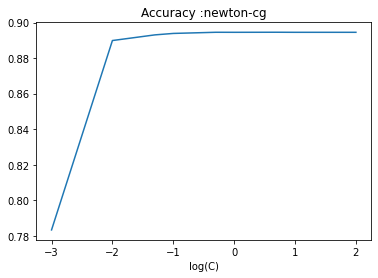

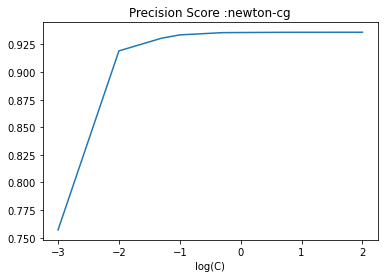

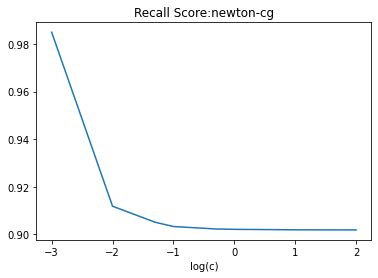

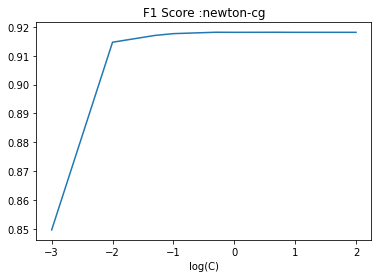

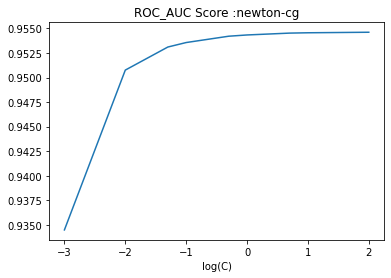

In [ ]:
C=[0.001,0.01,0.05,0.1,0.5,1,5,10, 100]
C=np.log10(np.array(C))
plt.plot(C,accuracy_nw1) ##accuracy
plt.title('Accuracy :' + solver)
plt.xlabel('log(C)')
plt.show()

plt.plot(C,precision_nw) ##precision
plt.title('Precision Score :' + solver)
plt.xlabel('log(C)')
plt.show()

plt.plot(C,recall_nw) ##recall
plt.title('Recall Score:' + solver)
plt.xlabel('log(c)')
plt.show()

plt.plot(C,f1_nw) ##F1 score
plt.title('F1 Score :' + solver)
plt.xlabel('log(C)')
plt.show()

plt.plot(C,roc_auc_nw) ##roc_auc score
plt.title('ROC_AUC Score :' + solver)
plt.xlabel('log(C)')
plt.show()